Accuracy: 99.88584474885845
Confusion Matrix:
[[  2   0   0]
 [  1 867   0]
 [  0   0   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00       868
           2       1.00      1.00      1.00         6

    accuracy                           1.00       876
   macro avg       0.89      1.00      0.93       876
weighted avg       1.00      1.00      1.00       876



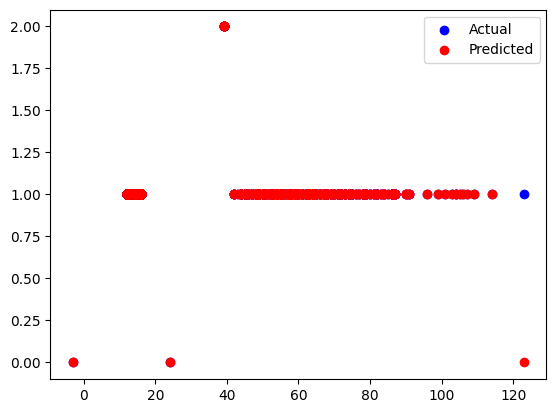

In [ ]:
#import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load data
data_heart = pd.read_csv('heartrate.csv')
data_resp = pd.read_csv('resp rate.csv')

# Combine data
data_comb = pd.concat([data_heart, data_resp])
data_comb.reset_index(drop=True, inplace=True)

# Preprocessing
# Encode 'Condition' to numerical values
le = LabelEncoder()
data_comb['Condition'] = le.fit_transform(data_comb['Condition'])

# Handle missing values
# Use mean strategy for imputation
# Impute missing values in 'Rate'
imputer = SimpleImputer(strategy='mean')
data_comb['Rate'] = imputer.fit_transform(data_comb[['Rate']])

# Split data into features and labels
X = data_comb[['Rate']].values
y = data_comb['Condition'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy*100}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Plotting the data
# Scatter plot for actual values
 # Scatter plot for predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.show()
